Myers Briggs Type Indicator (MBTI) is a personality type that divides people into 16 different personality types:

Introversion (I) – Extroversion (E)
Intuition (N) – Sensing (S)
Thinking (T) – Feeling (F)
Judging (J) – Perceiving (P)

2^4 personaity types. For the data and further infromation visit the below link-
https://www.kaggle.com/datasnaek/mbti-type
https://medium.com/towards-data-science/latent-semantic-analysis-deduce-the-hidden-topic-from-the-document-f360e8c0614b

In [210]:
import pandas as pd

importing data

In [211]:
data=pd.read_csv('C:/Users/91892/Desktop/prac_data.csv') 

here i have selected only one column 'posts'

made it a dataframe

In [214]:
df = pd.DataFrame(data) 

In [216]:
#remove special characters from the column 'posts' then save it with a new column 'clean_data'
df['clean_data'] = df['posts'].str.replace("[^a-zA-Z#]", " ") 

C:\Users\91892\AppData\Local\Temp/ipykernel_13516/1400620928.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_data'] = df['posts'].str.replace("[^a-zA-Z#]", " ")


fill the NAs with empty and keep the words that have letters greater than 2 

In [218]:
df['clean_data'] = df['clean_data'].fillna('').apply(lambda x: ' '.join([w for w in x.split() if len(w)>2])) 

lowercase all words

In [219]:
df['clean_data'] = df['clean_data'].fillna('').apply(lambda x: x.lower())

to remove a, an, the (stopwords)  because the focus is on context

In [220]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91892\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tokenization: splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.

In [221]:
tokenized_doc = df['clean_data'].fillna('').apply(lambda x: x.split())

de-tokenization

In [223]:
detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
df['clean_data'] = detokenized_doc    

In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [226]:
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)

In [228]:
X = vectorizer.fit_transform(df['clean_data'])

In [230]:
dictionary = vectorizer.get_feature_names()

C:\Users\91892\.conda\envs\KagglePsy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [232]:
from sklearn.decomposition import TruncatedSVD

In [233]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)

In [234]:
lsa = svd_model.fit_transform(X)

In [244]:
pd.options.display.float_format = '{:,.16f}'.format
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["documents"] = df['clean_data']

In [236]:
import matplotlib.pyplot as plt

extracting the values and saving it in an array to plot

In [237]:
data2=data1[['topic_1','topic_2']].values

adding the colomn named 'type' in the real dataset from Kaggle.com (MBTI)

In [238]:
data1["label"]=pd.read_csv('C:/Users/91892/Desktop/data.csv')

In [242]:
import seaborn as sbn

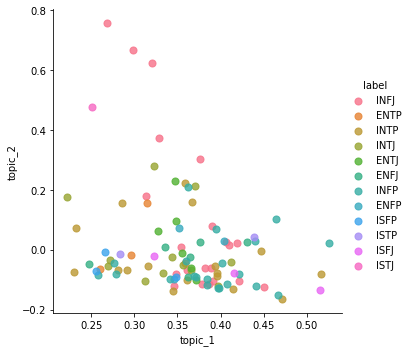

In [243]:
sbn.lmplot(x="topic_1",y="topic_2",data=data1,hue="label",fit_reg=False,scatter_kws={"s":50})